<a href="https://colab.research.google.com/github/kapilkn/ML/blob/master/COVID_INDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 - INDIA
**Kapil Nagwanshi**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = 'https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_india.csv'
df = pd.read_csv(path)
df.head()

,state,active,confirmed,deaths,recovered,Lat,Long
0,Maharashtra,5304,6427,283,840,19.7515,75.7139
1,Delhi,1518,2376,50,808,28.7041,77.1025
2,Gujarat,2254,2624,112,258,22.2587,71.1924
3,Rajasthan,1485,1964,28,451,27.0238,74.2179
4,Tamil Nadu,911,1683,20,752,11.1271,78.6569


In [3]:
tot_active = df.groupby('state')['active'].sum().sort_values(ascending=False).to_frame()
tot_active.head()

,active
state,
Maharashtra,5304
Gujarat,2254
Delhi,1518
Rajasthan,1485
Madhya Pradesh,1401


In [4]:
tot_active.style.background_gradient(cmap='Reds')

,active
state,
Maharashtra,5304
Gujarat,2254
Delhi,1518
Rajasthan,1485
Madhya Pradesh,1401
Uttar Pradesh,1280
Tamil Nadu,911
Andhra Pradesh,725
Telangana,693


In [5]:
df.head().style.background_gradient(cmap='Reds')

,state,active,confirmed,deaths,recovered,Lat,Long
0,Maharashtra,5304,6427,283,840,19.751500,75.713900
1,Delhi,1518,2376,50,808,28.704100,77.102500
2,Gujarat,2254,2624,112,258,22.258700,71.192400
3,Rajasthan,1485,1964,28,451,27.023800,74.217900
4,Tamil Nadu,911,1683,20,752,11.127100,78.656900


In [6]:
data = df[['state','confirmed',	'active', 'deaths',	'recovered'	]]
data.sort_values('confirmed',ascending=False,inplace=True)
data.head().style.background_gradient(cmap='Reds')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,state,confirmed,active,deaths,recovered
0,Maharashtra,6427,5304,283,840
2,Gujarat,2624,2254,112,258
1,Delhi,2376,1518,50,808
3,Rajasthan,1964,1485,28,451
5,Madhya Pradesh,1687,1401,83,203


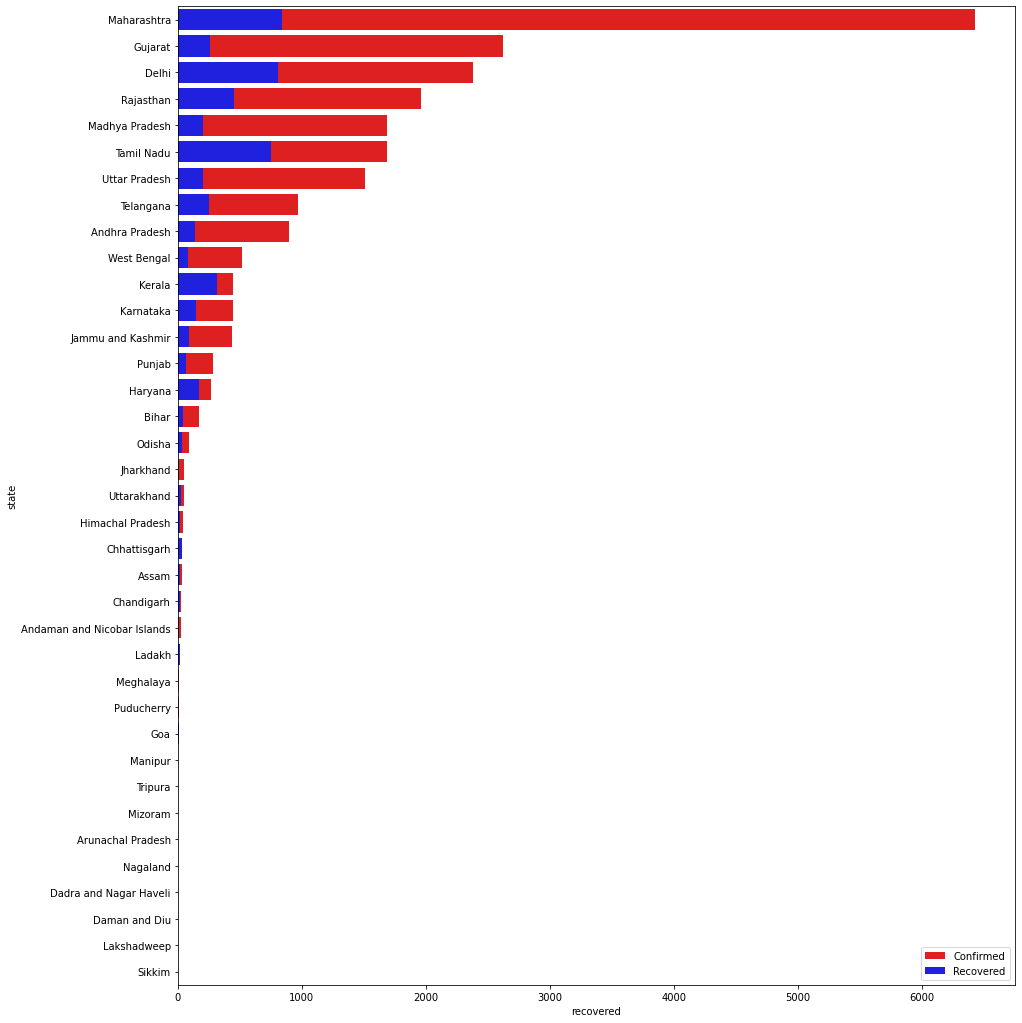

In [7]:
### plot confirmed vs cured
plt.figure(figsize=(15,18))
sns.barplot(data['confirmed'],data['state'],color='red',label='Confirmed')
sns.barplot(data['recovered'],data['state'],color='blue',label='Recovered')
plt.legend(loc=4)
plt.show()

In [11]:
import folium
# declaration of map 
india_map = folium.Map(location=[9,80], zoom_start= 4, max_zoom=5, height= 1000, width='100%')

for i in range(0, len(df[df['confirmed']>0].index)):
    folium.Circle(
        location=[df.iloc[i]['Lat'], df.iloc[i]['Long']],
        radius=0,
        fill=True).add_to(india_map)
india_map

In [12]:
import folium
# declaration of map 
india_map = folium.Map(location=[9,80], zoom_start= 4, max_zoom=5, height= 1000, width='100%')

for i in range(0, len(df[df['confirmed']>0].index)):
    folium.Circle(
        location=[df.iloc[i]['Lat'], df.iloc[i]['Long']],
        radius=(int(np.log2(df.iloc[i]['confirmed']+1.0001)))*15000,
        fill=True).add_to(india_map)
india_map

In [13]:
import folium
import numpy as np
# declaration of map 
india_map = folium.Map(location=[9,80], zoom_start= 4, max_zoom=5, height= 1000, width='100%')

for i in range(0, len(df[df['confirmed']>0].index)):
    folium.Circle(
        location=[df.iloc[i]['Lat'], df.iloc[i]['Long']],
        radius=(int(np.log2(df.iloc[i]['confirmed']+1.0001)))*15000,
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df.iloc[i].state+"</h5>"+
        "<li>Confirmed: "+str(df.iloc[i]['confirmed'])+"</li>"+
        "<li>Active:   "+str(df.iloc[i]['active'])+"</li>"+
        "<li>Recovered:   "+str(df.iloc[i]['recovered'])+"</li>"+
        "<li>Deaths:   "+str(df.iloc[i]['deaths'])+"</li>"+
        "</ul>",
        fill=True).add_to(india_map)
india_map